In [12]:
pd.read_csv("../8_train.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195008 entries, 0 to 195007
Data columns (total 9 columns):
age                                     195008 non-null float64
RevolvingUtilizationOfUnsecuredLines    195008 non-null float64
DebtRatio                               195008 non-null float64
MonthlyIncome                           195008 non-null float64
NumberOfOpenCreditLinesAndLoans         195008 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    195008 non-null float64
NumberOfTimes90DaysLate                 195008 non-null float64
NumberOfDependents                      195008 non-null float64
SeriousDlqin2yrs                        195008 non-null int64
dtypes: float64(8), int64(1)
memory usage: 13.4 MB


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
#载入数据
data = pd.read_csv("../8_train.csv")
#拆分训练集与测试集
X = data.iloc[0:2000,:-1]
Y = data.iloc[0:2000,-1]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
from sklearn.linear_model import LogisticRegression as LR
model = LR(penalty='l2').fit(X,Y)
#判断准确度
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
print("name : log score: {}".format(cross_val_score(model,X,Y,cv=kfold).mean()))

name : log score: 0.78


In [16]:
#使用测试集得分
df = pd.read_csv("../8_test.csv")
x_test = df.iloc[:,:-1]
y_test = df.iloc[:,-1]
model.score(x_test,y_test)

0.7610199100220159

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

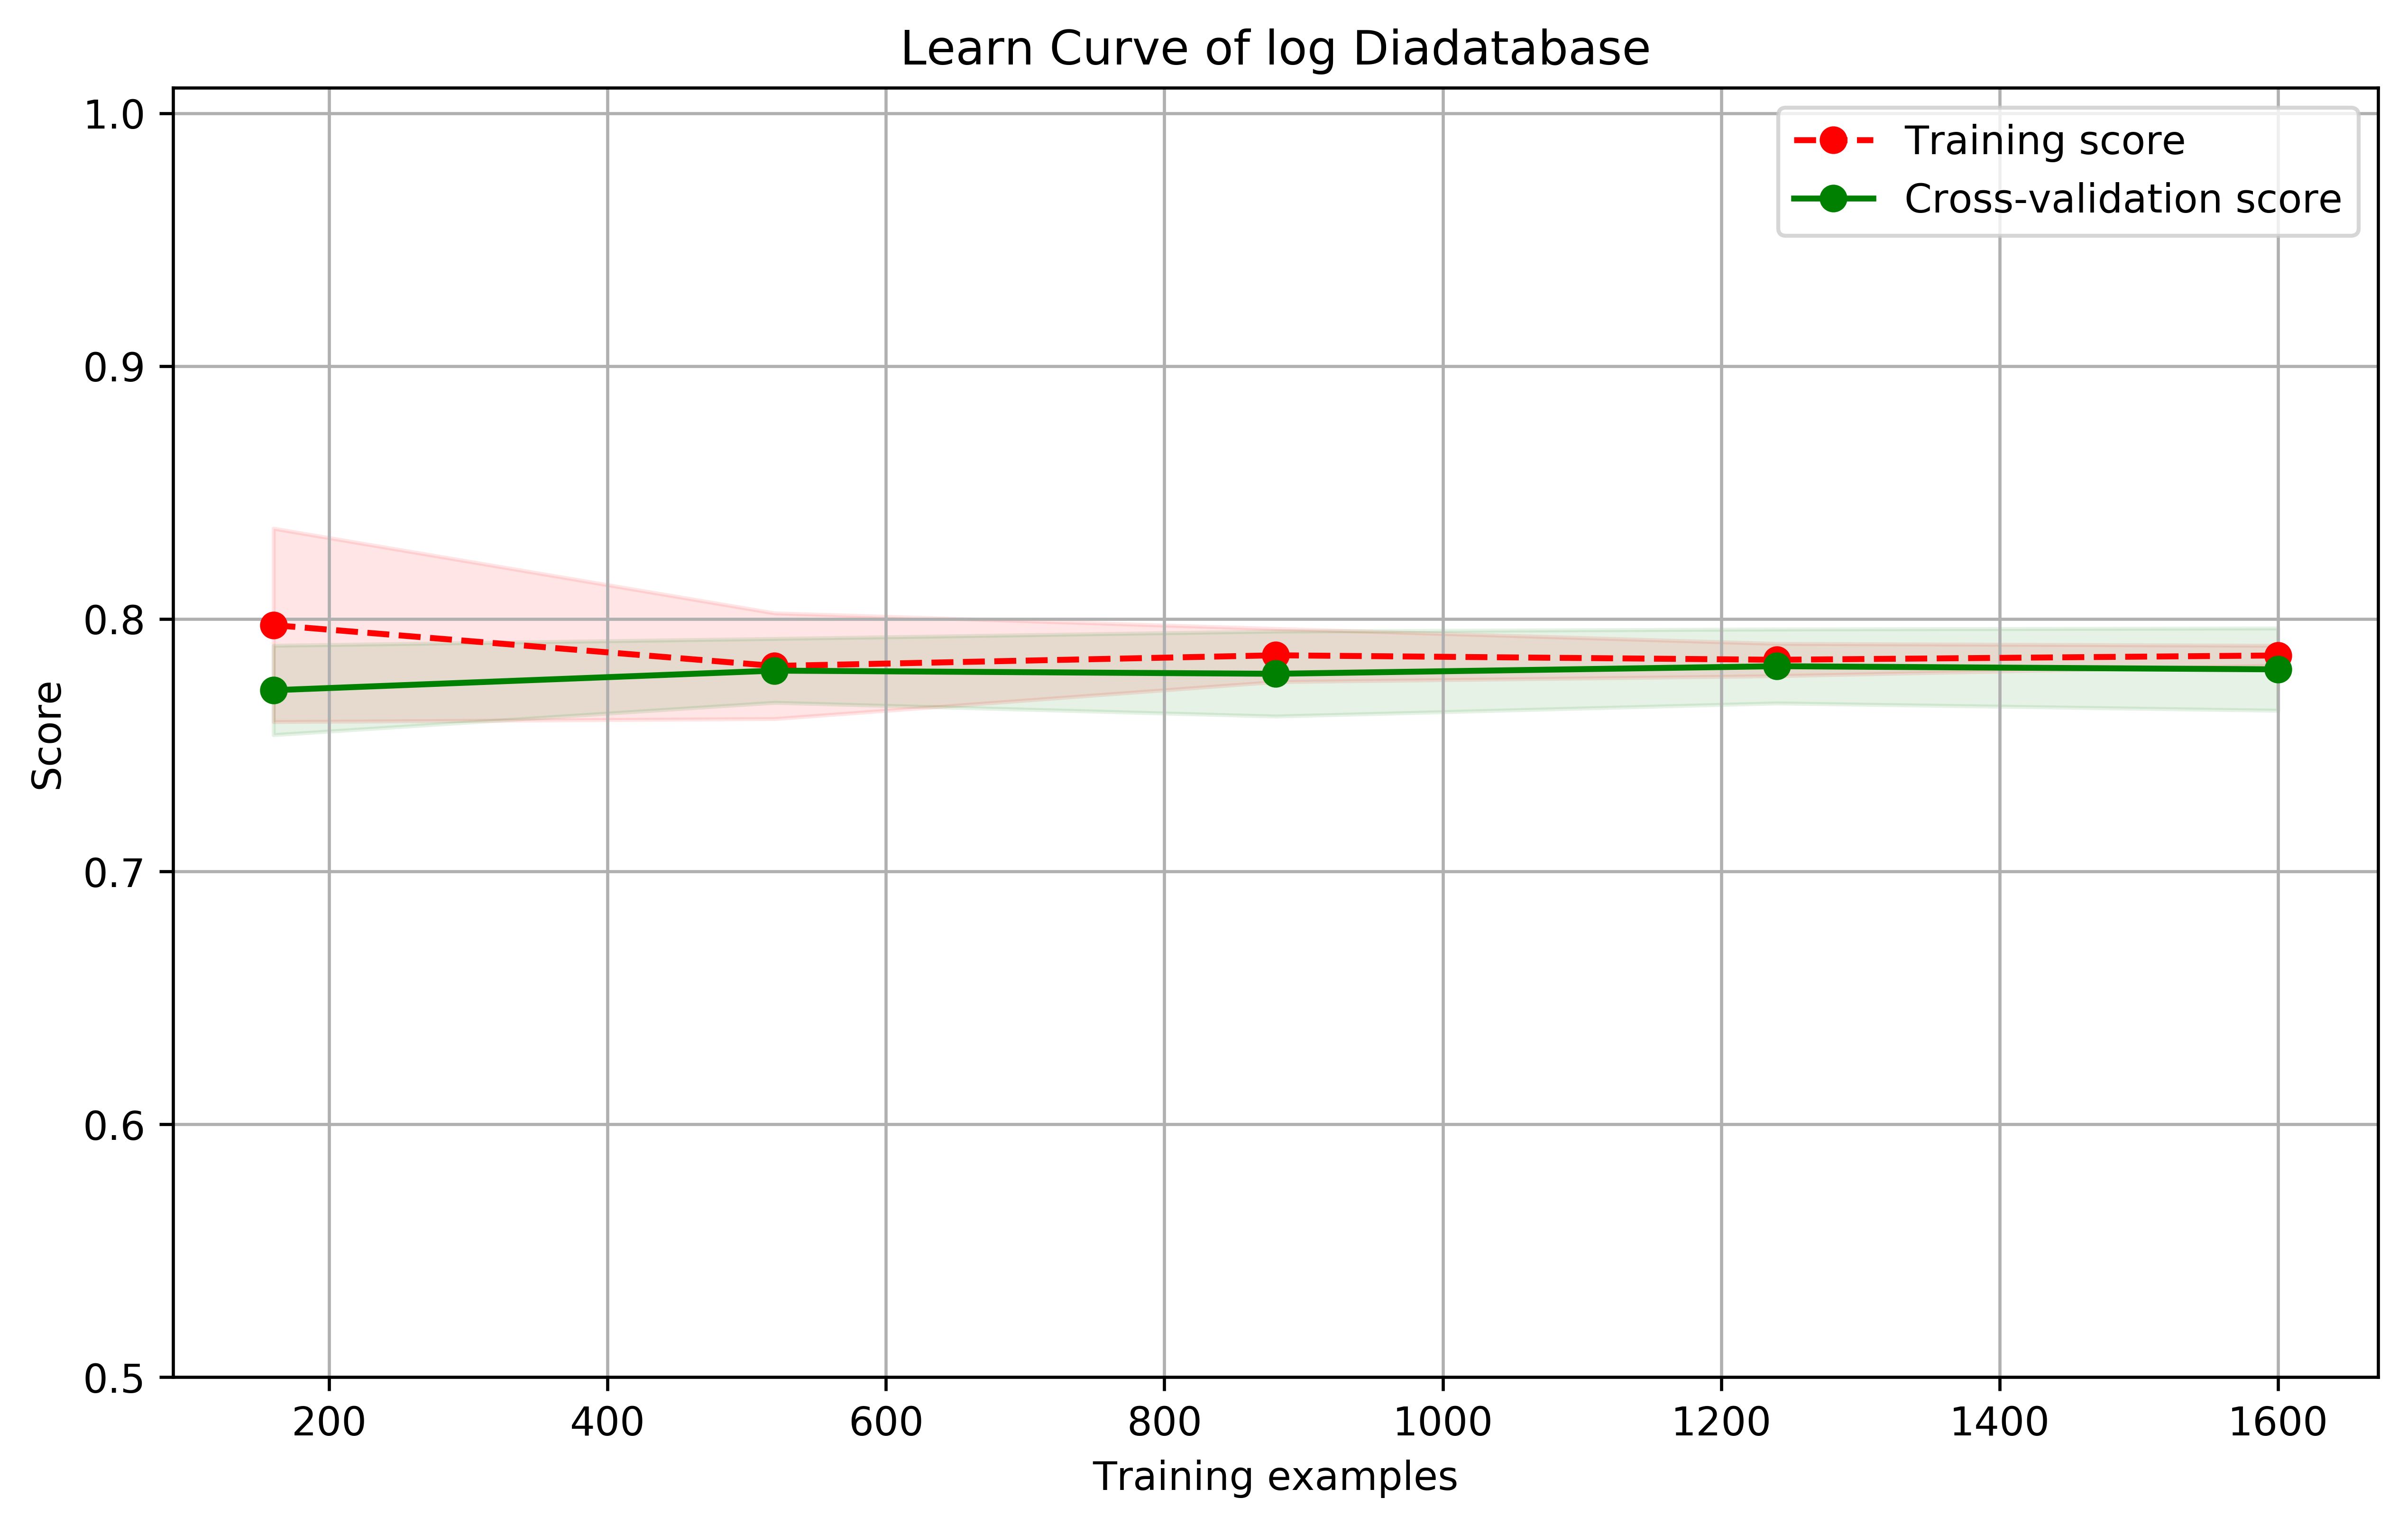

In [14]:
#画出学习曲线
from sklearn.model_selection import ShuffleSplit
from commons.utils import plot_learning_curve
import matplotlib.pyplot as plt
cv = ShuffleSplit(n_splits=10,test_size=.2,random_state=42)
plt.figure(figsize=(10,6),dpi=600)
plot_learning_curve(plt,
                   model,
                    "Learn Curve of log Diadatabase",
                    X,Y,
                    ylim=(.5,1.01),
                    cv=cv)